# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [15]:
import pandas as pd
import numpy as np
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
employee= pd.read_csv('Employee.csv')
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1 -groupby
 
employee.groupby('Department')[['Salary']].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2 -pivot table
#pivot is used mostly to make a calculation on a sample of the table

employeept=pd.pivot_table(employee, values='Salary', index='Department') 
employeept.head()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
#multiple indexes
employeemi = pd.pivot_table(employee, values='Salary',index=['Department','Title'])  #the aggr function by default is the mean
employeemi.head(10)
 

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
#display the number of years of work experience and the salary for each Title.
employeed = pd.pivot_table(employee, values=['Salary','Years'],index=['Title'])
employeed.head()


,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [38]:
info=pd.pivot_table(employee,values=['Salary','Name'],index=['Department','Title'],aggfunc={'Name': pd.Series.count, 'Salary':np.mean})
info.head(10)
#'Name': pd.Series.count will count the number of values

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
infosalary=pd.pivot_table(employee,values=['Salary'],index=['Department','Title'],aggfunc=['sum', 'median', 'min', 'max','std'])
infosalary.head(10)
# In std column, some NaN because only one employee and 0,00 two employees with the same salary

sum median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP            70   70.0     70     70       NaN
           analyst       65   32.5     30     35  3.535534
IT         VP            70   70.0     70     70       NaN
           analyst       65   32.5     30     35  3.535534
           associate     60   60.0     60     60       NaN
Sales      associate    110   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
infosalaryb=pd.pivot_table(employee,values=['Salary'],index=['Department','Title'], aggfunc=['sum', 'median', 'min', 'max','std'], fill_value= 'null')
infosalaryb.head(10) #fill_value='xx' to replace NaN, 0,...

sum median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP            70   70.0     70     70       NaN
           analyst       65   32.5     30     35  3.535534
IT         VP            70   70.0     70     70       NaN
           analyst       65   32.5     30     35  3.535534
           associate     60   60.0     60     60       NaN
Sales      associate    110   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [16]:
ts=pd.pivot_table(employee,values=['Salary','Name'],index=['Department'],aggfunc={'Name': pd.Series.count, 'Salary':np.sum})
ts.head()
#'Name': pd.Series.count will count the number of values VS Sum (add the names together)

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [14]:
tyw=pd.pivot_table(employee,values=['Years','Salary'],index=['Department','Title'],aggfunc={'Years': np.sum, 'Salary':np.mean})
tyw.head(6)

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [37]:
fitbit= pd.read_csv('Fitbit.csv')
fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
5,13-05-2015,276,779,5.79,15,726.000,172,34,18,1094,405,47,31,457
6,14-05-2015,2687,5614,4.17,2,782.000,216,13,1,9830,381,28,12,415
7,15-05-2015,2793,8169,6.07,14,801.000,218,8,7,1092,269,34,16,306
8,16-05-2015,4061,19971,14.84,18,532.000,247,101,118,27,452,26,18,507
9,17-05-2015,3349,852,6.33,12,606.000,186,46,73,1766,269,17,11,291


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [32]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [33]:
fitbit.mean()

Calorie burned             2741.501362
Steps                     10121.588556
Distance                      8.549128
Floors                       11.724796
Minutes Sedentary           563.934482
Minutes Lightly Active      236.405995
Minutes Fairly Active        26.163488
Minutes Very Active          35.722071
Activity Calories          2044.147139
MinutesOfSleep              290.479564
MinutesOfBeingAwake          28.008174
NumberOfAwakings             16.196185
LengthOfRestInMinutes       321.343324
dtype: float64

In [34]:
fitbit.std() #standard deviation

Calorie burned             916.307036
Steps                     5594.836225
Distance                     3.409881
Floors                      10.337370
Minutes Sedentary          294.793145
Minutes Lightly Active      86.531376
Minutes Fairly Active       20.319456
Minutes Very Active         31.006682
Activity Calories         2041.267168
MinutesOfSleep             154.752328
MinutesOfBeingAwake         18.541415
NumberOfAwakings            10.757622
LengthOfRestInMinutes      170.786726
dtype: float64

In [35]:
fitbit.median()

Calorie burned             2974.00
Steps                     10413.00
Distance                      8.29
Floors                       11.00
Minutes Sedentary           663.00
Minutes Lightly Active      226.00
Minutes Fairly Active        24.00
Minutes Very Active          29.00
Activity Calories          1553.00
MinutesOfSleep              337.00
MinutesOfBeingAwake          29.00
NumberOfAwakings             16.00
LengthOfRestInMinutes       370.00
dtype: float64

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [19]:
#Correlation between steps and Minutes Very Active
corrfit=fitbit['Steps'].corr(fitbit['Minutes Very Active'])
print(corrfit) #close to 1 means strong correlation

0.5714518481062608


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

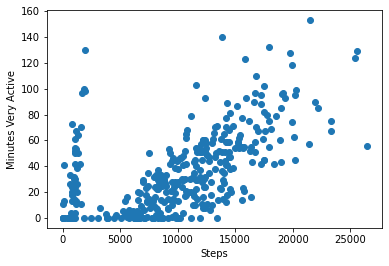

In [20]:
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
#Doesn't show a pattern of correlation 
#we can see in the first verticale line of points that the person is being 'very active' but not necessarily walking or running
#and the line at the bottom also indicates that you can walk up to 10000 steps in a not 'very active' way


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [21]:
corrSed=fitbit['Steps'].corr(fitbit['Minutes Sedentary'])
#close to 1 means strong correlation
print(corrSed)

0.07690608062990091


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

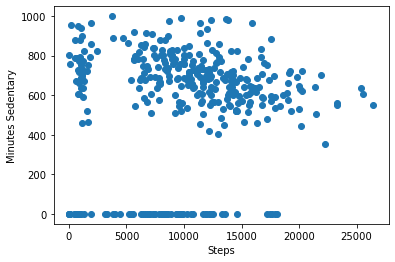

In [22]:
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])
plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')
plt.show()
#They don't have a correlation
#even, when the person is doing the steps, the person is counted as being sedentary

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
corrSleep=fitbit['Steps'].corr(fitbit['MinutesOfSleep'])
#close to 1 means strong correlation
print(corrSleep)

0.1309856595083638


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

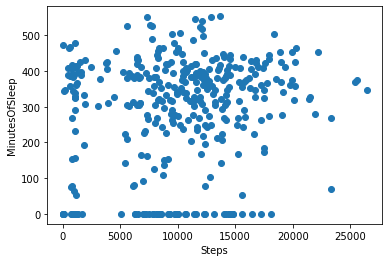

In [24]:
plt.scatter(x=fitbit['Steps'], y=fitbit['MinutesOfSleep'])
plt.xlabel('Steps')
plt.ylabel('MinutesOfSleep')
plt.show()
#They are not correlated

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
#column= fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
#column       #subset

#correlation in a subset of the df
cor_fit=fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [26]:
sortedcor=cor_fit.sort_values(by='Steps', ascending=False)
sortedcor
#The hightest correlated value to 'Steps' is 'Minute Very Active', in this chart, though the correlation is not very strong. The second is 'Floors' (altimeter).

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [27]:
time_grades= pd.read_csv('Time_Grades.csv')
time_grades.head(10)


,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

array([[<AxesSubplot:title={'center':'Study time'}>,
        <AxesSubplot:title={'center':'Grade'}>]], dtype=object)

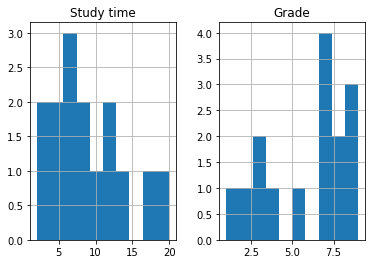

In [28]:
#we use histograms to show the frequency distribution
time_grades.hist()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [29]:
time_grades.corr(method='spearman') # Spearman correlation (are the values moving in the same direction?)

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [30]:
time_grades.corr(method='pearson') #Pearson correlation measures linearity

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

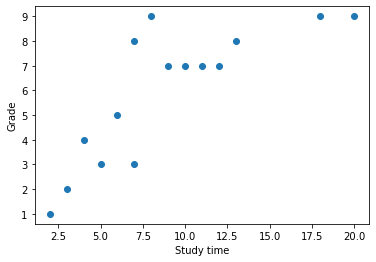

In [31]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()
#There is a correlation between grades and study time for the first 6-7hours of studying time, then there seems to be a plateau between 7h30 and 13h 
#where studying longer doesn't equate to better grades.But then, the 2 students who studied the longuest time got the best grades. 

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#Pearson: studies linear correlation, if things grow at the same rate (is more sensitive to outliers)
#Spearman : studies 'movement'of values if it is going in the same direction (based on their rank rather than raw data)